In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as mt
%matplotlib inline

In [2]:
train=pd.read_csv("train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


first we find the null values in given data set

In [4]:
train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


now it become difficult to trace null values because there can be millions of data so we use seaborn library to plot a heatmap 

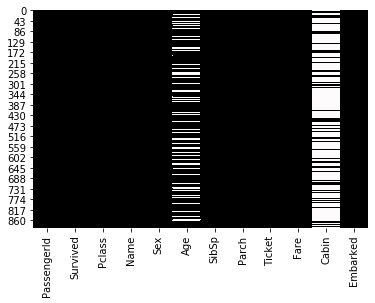

In [5]:
sn.heatmap(train.isnull(),    xticklabels=True,cbar=False,cmap='gist_earth')

now we need to know how may peope survived or how many not....!!

using again seaborn library

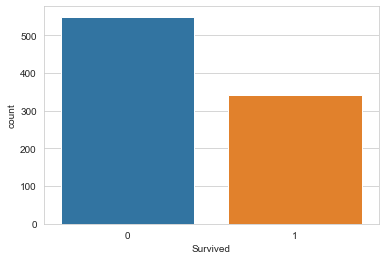

In [6]:
sn.set_style('whitegrid')
sn.countplot(x='Survived',data=train)

now we distiguise on the basis of sex e.i; how many male and female survived

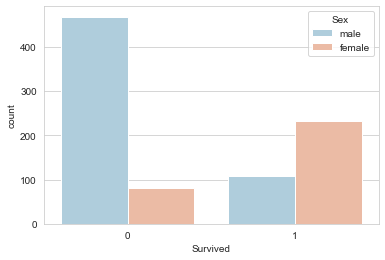

In [7]:
sn.set_style('whitegrid')
sn.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

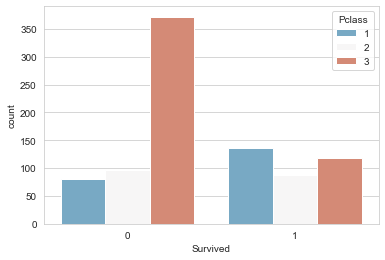

In [8]:
sn.set_style('whitegrid')
sn.countplot(x='Survived',hue='Pclass',data=train,palette='RdBu_r')

now we extract information about the age of people with no. of people with same ages

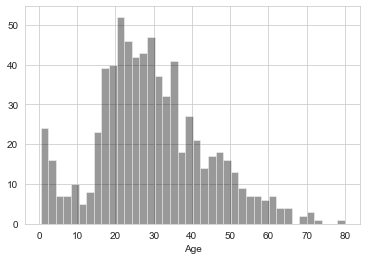

In [9]:
sn.distplot(train['Age'].dropna(),kde=False,color='black',bins=40)

now we have to find people having no of spouse or siblings

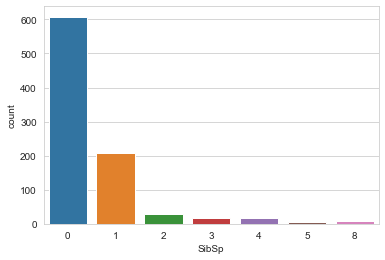

In [10]:
sn.countplot(x='SibSp',data=train)

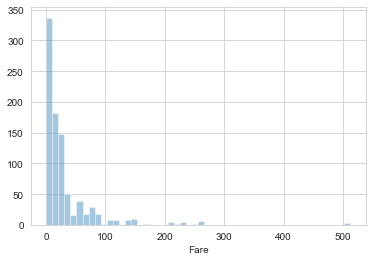

In [11]:
sn.distplot(train['Fare'],kde=False)

#or

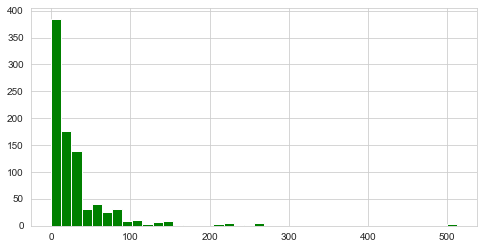

In [12]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

now we have to remove nan values ,here we find relation between passenger class and their age for that relation we use boxplot

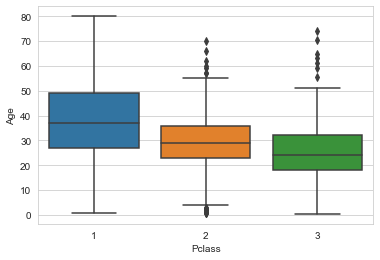

In [13]:
mt.Figure(figsize=(12,7))
sn.boxplot(x='Pclass',y='Age',data=train)

now here we find that the average age of 1 class=38(approx),2 class=28(approx),3 class=25(approx)

so we define a function to remove nan values

In [14]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
     
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 28
        else:
            return 25
    else:
        return Age
    
    

now apply that function

In [15]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

In [16]:
(pd.isnull(train['Age']))

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
861    False
862    False
863    False
864    False
865    False
866    False
867    False
868    False
869    False
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878    False
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

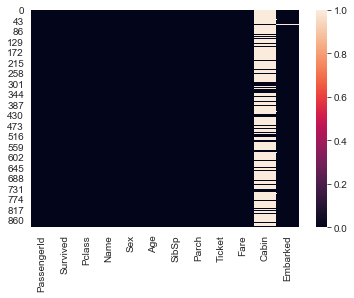

In [17]:
sn.heatmap(train.isnull())

In [18]:
train.drop('Cabin',axis=1,inplace=True)

In [19]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [20]:
pd.isnull(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [22]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [23]:
train.drop(['Name','Sex','Embarked','Ticket'],axis=1,inplace=True)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [25]:
train=pd.concat([train,sex,embark],axis=1)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Great! now  our data is ready for our model 

BUILDING A logistic regression model

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(train.drop(['Survived'],axis=1),train['Survived'],test_size=0.30,random_state=101)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\CLASSY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
prediction=logmodel.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix

In [34]:
accuracy=confusion_matrix(y_test,prediction)

In [35]:
accuracy

array([[135,  19],
       [ 41,  73]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy=accuracy_score(y_test,prediction)

In [38]:
accuracy

0.7761194029850746

In [39]:
prediction

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

all done